In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
from econml.dml import DMLCateEstimator,SparseLinearDMLCateEstimator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, LogisticRegression, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.pipeline import Pipeline
import scipy.special

In [334]:
import numpy as np
n = 1000
d= 2
X = np.random.normal(0, 1, size=(n,d))
true_fn = lambda x: x[:, 0]**3
T = X[:, 0] + np.random.normal(0, 1, size=(n,))
y = true_fn(X)*T + np.random.normal(0, 1, size=(n,))

In [335]:
est = SparseLinearDMLCateEstimator(model_final=Lasso(alpha=0.01), featurizer=PolynomialFeatures(degree=2))
est.fit(y, T, X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default v

In [336]:
lower, upper = est.conformal(X, y, T, X)

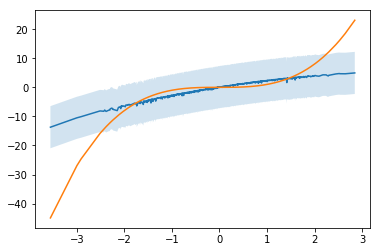

In [337]:
sort_ind = np.argsort(X[:, 0])
plt.plot(X[sort_ind, 0], est.effect(X[sort_ind]))
plt.fill_between(X[sort_ind, 0], lower[sort_ind], upper[sort_ind], alpha=.2)
plt.plot(X[sort_ind, 0], true_fn(X[sort_ind]))
plt.show()

In [338]:
np.mean((true_fn(X)>lower) & (true_fn(X) < upper))

0.988

In [339]:
true_fn(X[[0]])

array([-0.002258])

In [340]:
upper[0]

7.011103417553097

In [341]:
lower, upper = est.local_conformal(X, y, T, X)

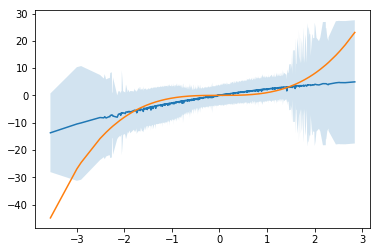

In [342]:
sort_ind = np.argsort(X[:, 0])
plt.plot(X[sort_ind, 0], est.effect(X[sort_ind]))
plt.fill_between(X[sort_ind, 0], lower[sort_ind], upper[sort_ind], alpha=.2)
plt.plot(X[sort_ind, 0], true_fn(X[sort_ind]))
plt.show()

In [333]:
np.mean((true_fn(X)>lower) & (true_fn(X) < upper))

1.0